# [IAPR][iapr]: Lab 2 ‒  Object description

**Group ID:** 2

**Author 1 (sciper):** Chiara Maria Matti (350647)  
**Author 2 (sciper):** Camille Lucette Gabrielle Delgrange (282250)   
**Author 3 (sciper):** Linda Delacombaz (288415)  

**Release date:** 24.03.2023  
**Due date:** 07.04.2023 (11:59 pm)


## Important notes

The lab assignments are designed to teach practical implementation of the topics presented during class as well as
preparation for the final project, which is a practical project which ties together the topics of the course.

As such, in the lab assignments/final project, unless otherwise specified, you may, if you choose, use external
functions from image processing/ML libraries like opencv and sklearn as long as there is sufficient explanation
in the lab report. For example, you do not need to implement your own edge detector, etc.

**! Before handling back the notebook <font color='red'> rerun </font>the notebook from scratch !**
`Kernel` > `Restart & Run All`

We will not rerun the notebook for you.


[iapr]: https://github.com/LTS5/iapr

---
## 0. Extract relevant data
We first need to extract the `lab-02-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library. In the `lab-02-data` folder, you will find 28x28 grey-scale pictures of handwritten "0", "1", "2" and "3".
These digits have been extracted from MNIST dataset (http://yann.lecun.com/exdb/mnist/).

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [1]:
import tarfile
import os

data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-02-data'
data_part1 = os.path.join(data_base_path, data_folder, 'part1')
data_part2 = os.path.join(data_base_path, data_folder, 'part2')

tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

### 0.1.Data visualization

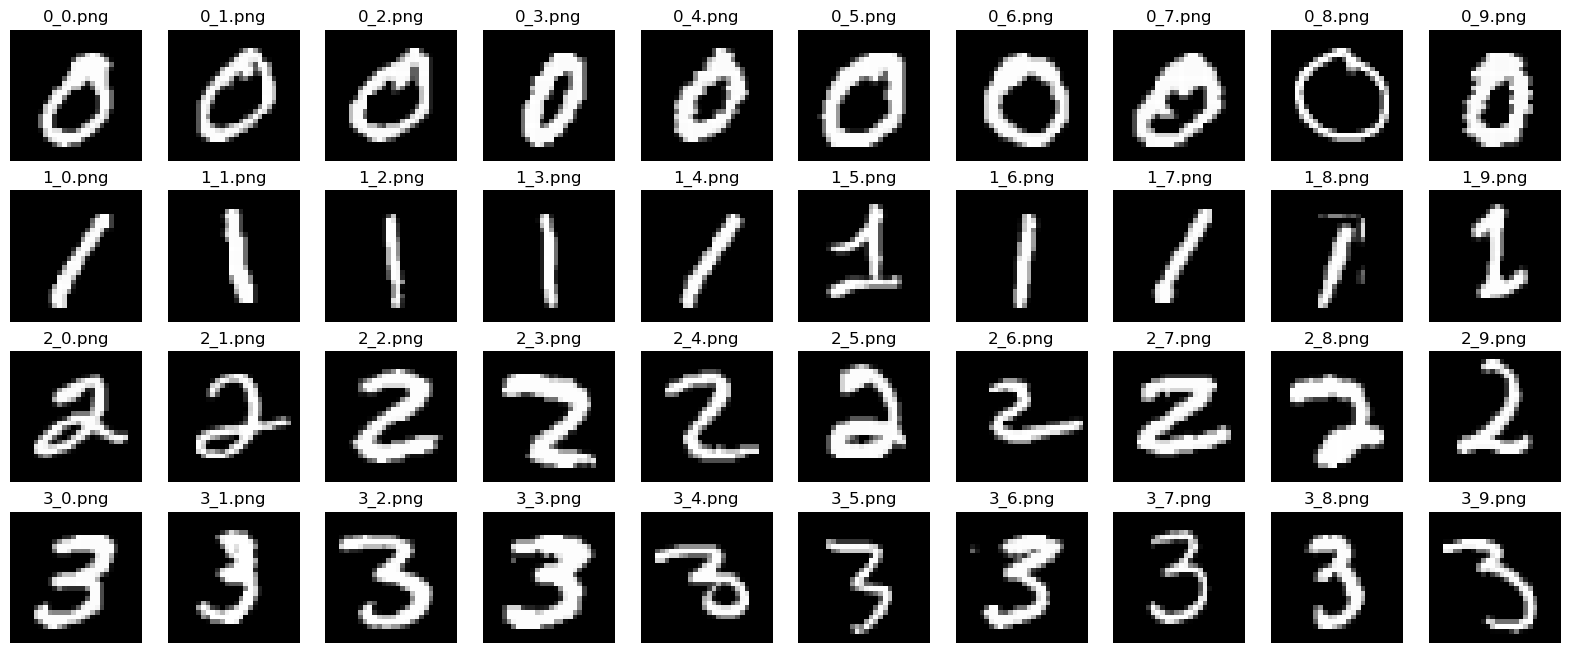

In [2]:
import skimage.io
import matplotlib.pyplot as plt
%matplotlib inline

def load(path, digit='0'):
    digit_path = os.path.join(path, digit)
    digit_names = [nm for nm in os.listdir(digit_path) if '.png' in nm]  # make sure to only load .png
    digit_names.sort()  # sort file names
    ic = skimage.io.imread_collection([os.path.join(digit_path, nm) for nm in digit_names])
    digit_im = skimage.io.concatenate_images(ic)
    return digit_im, digit_names
                        
# Load digits data

# Zero images arrays
zeros_im, zeros_names = load(data_part1, digit='0')
# Ones images arrays
ones_im, ones_names = load(data_part1, digit='1')
# Twos images arrays
twos_im, twos_names = load(data_part2, digit='2')
# Threes images arrays
threes_im, threes_names = load(data_part2, digit='3')

# Plot images
fig, axes = plt.subplots(4, len(zeros_im), figsize=(20, 8))
for ax, im, nm in zip(axes[0], zeros_im, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], ones_im, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[2], twos_im, twos_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[3], threes_im, threes_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

In [3]:
import numpy as np

---
## Part 1 - contour based descriptors (18 pts)

In this part you will use images of "0"s and "1"s.

**Objectives overview**: Fourier Descriptors


**1)** *Preprocess*: Select ONLY "0" and "1" images and apply suitable preprocessing. Show a plot with the preprocessed data and give arguments on the chosen techniques. (**2 pts**)


**2)** *Get descriptors*: Find the contours and get the Fourier descriptors in complex definition. *Note*: The contours arrays should contain a finite number (N-> self-chosen) of equi-distant points for each image (hint: interpolation). In the case of the "0" contours, just keep the outermost contour. Discuss the necessity of this format. (**4 pts**)
    
    
**3)** *Study effect of descriptors* : Show the contour-reconstruction of the digits using different amount of descriptors (both for ONE "0" image and ONE "1" image)
- Make 5 plots, reconstructing the digits' countours using different amounts of descriptors. (e.g. reconstruct the contour using the only the 1st fourier descriptor, reconstruct using the first two fourier descriptors,  using the first three ...)  
- **Hint**: check scipy fft, ifft, and fftfreq functions (see [link](https://docs.scipy.org/doc/scipy/tutorial/fft.html)) and pay attention on the ordering, observing which coefficients correspond to positive/negative frequencies of components and how you choose your low frequency subsets . 
- **Extra hint** To reconstruct the contour, copy the original vector of the fourier descriptors, keep the positive and negative frequencies you will use, and set to 0 the rest. (e.g. If you want to reconstruct the image with the first _three fourier descriptors_, keep the first _three positive frecuencies_ and their respective _three negative frequencies_ (see positive and negative bin frequencies [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fftfreq.html#scipy.fft.fftfreq) ). 
- Discuss about your findings. (**4 pts**)
    
        
**4)** *Clustering*: For each image containing a "0" or a "1", using the fourier descriptors, extract a 2-dimensional feature vector (using the THE POSITIVE bin frequencies from fftfreq, see [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fftfreq.html#scipy.fft.fftfreq) ) and plot all of them on a 2D graph. Did you obtain a plot where the vectors of the "0"'s nicely cluster in one part of the plane and those of the "1"'s in the other? If yes, explain why. (**2 pts**)
    
    
**5)** *Show translation, rotation and scale invariance*
- Firstly, discuss which descriptors, or which part of the descriptors are affected by each transformation. For each transformation define (write in words) an operation which will be applied to the descriptor arrays, such that they will be invariant to (not affected by) the specific transformation anymore. After finding the necessary operations, define a function that will make the Fourier descriptors invariant to all the transformations, altogether.(**3 pts**) 
- Secondly, show that if you are using descriptors invariant to transformations, you still obtain 2 nicely defined clusters for the 2 categories of numbers, under transformations applied. (You need to define custom functions for each transformation, apply them on images, and compare the obtained invariant descriptors). Discuss your findings. (**3 pts**)

### 1. Fourier Descriptors

### 1.1. Preprocess and visualization (2 pts)

As far as preprocessing goes, we need two steps:
- check that the images are binary, to allow an easier feature extraction
- check if specific images need corrections  

For the first point, we start by looking at the histograms.

In [4]:
# First, we define a function that plots the histograms of one type of image:
def hist_plot(images, im_names):
    fig, axes = plt.subplots(2, np.ceil(len(images)/2).astype(int), figsize=(20, 10))
    for ax, im, nm in zip(axes.ravel(), images, im_names):
        # if np.max(im.ravel()) <= 1:
        #     im = im*255
        ax.hist(im.ravel(), bins=256, range=(0, 256), fc='k', ec='k') # fc and ec are the facecolor and edgecolor
        ax.set_title(nm)
        ax.set_ylabel('Number of pixels')
        ax.set_xlabel('Pixel value')
    plt.show()
    plt.tight_layout()

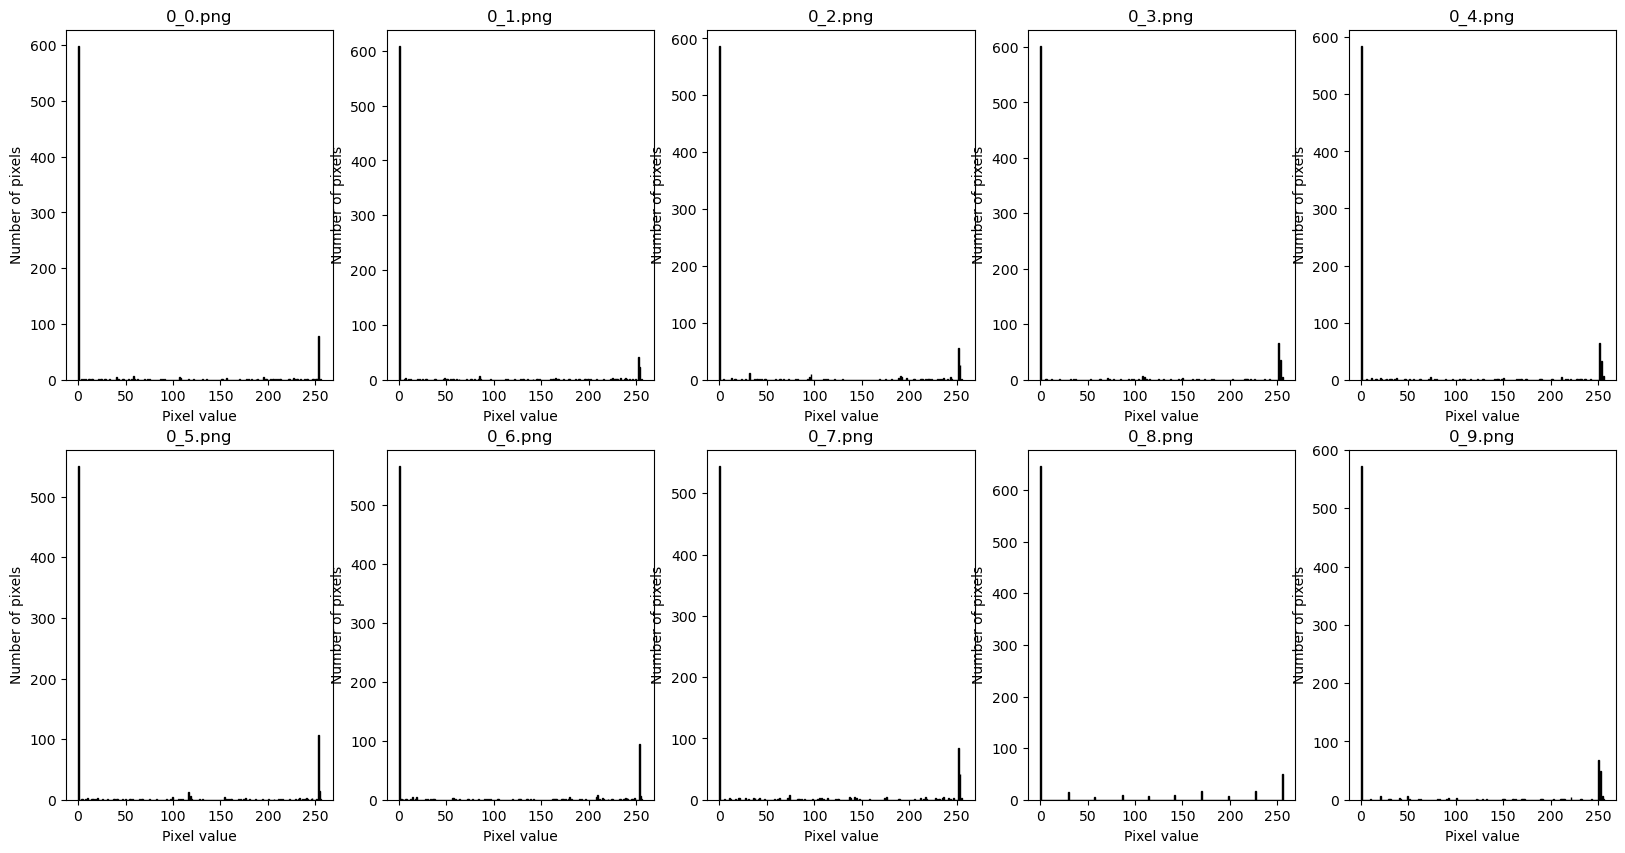

<Figure size 640x480 with 0 Axes>

In [5]:
# we plot the histograms of the zeros:
hist_plot(zeros_im, zeros_names)

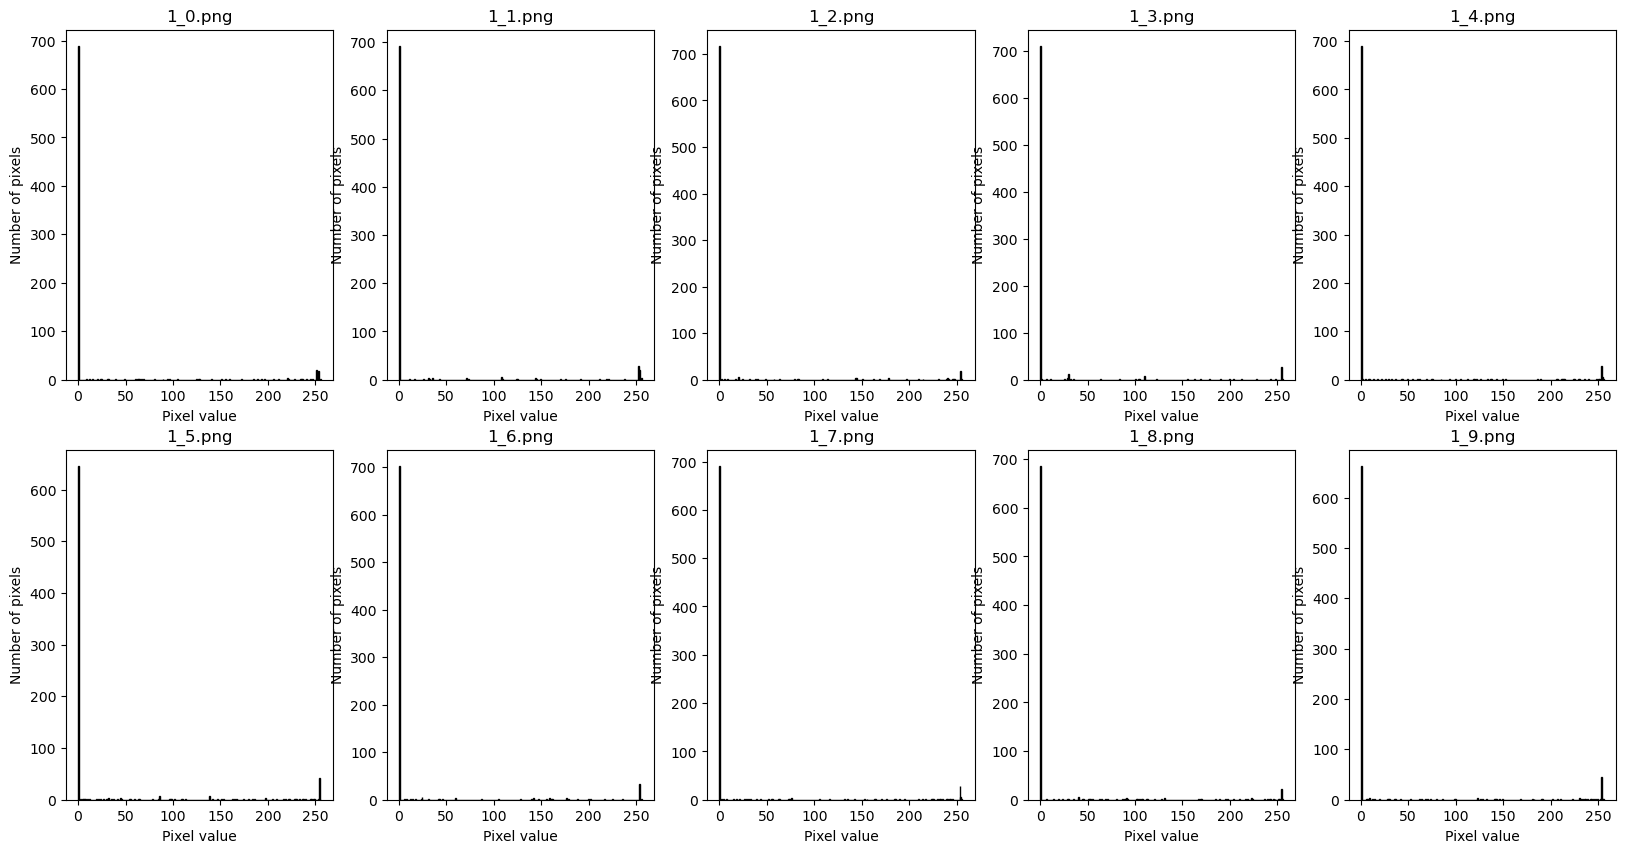

<Figure size 640x480 with 0 Axes>

In [6]:
# we plot the histograms of the ones:
hist_plot(ones_im, ones_names)

We observe that, in both cases, the images are not binary. To have a good contour detection in each image, we binarize them, rounding each pixel to either 0 or 255.

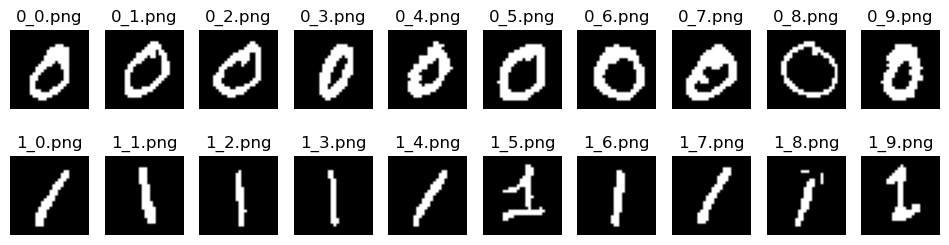

In [7]:
bin_transform = lambda x: ((x.astype(float) / 255).round() * 255).astype(np.uint8)
bin_zeros_im = bin_transform(zeros_im)
bin_ones_im = bin_transform(ones_im)

# Plot images
fig, axes = plt.subplots(2, len(bin_zeros_im), figsize=(12, 3))
for ax, im, nm in zip(axes[0], bin_zeros_im, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], bin_ones_im, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

We notice that the second to last 1 is not closed, therefore we apply an opening to it to fix this problem.

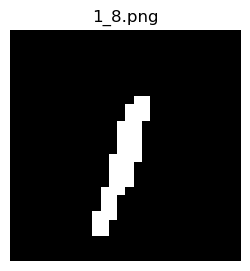

In [8]:
from skimage.morphology import square
from skimage.morphology.binary import binary_opening 
# opening allows to remove small objects from the foreground of an image
    
# Opening on 1_8.png
bin_ones_im[8] = binary_opening(bin_ones_im[8], square(2))
bin_ones_im[8][bin_ones_im[8] == 1] = 255 

# Plot images
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
ax.imshow(bin_ones_im[8], cmap='gray')
ax.axis('off')
_ = ax.set_title('1_8.png')

We observe that the aforementioned issue is now solved. We then visualize the final result

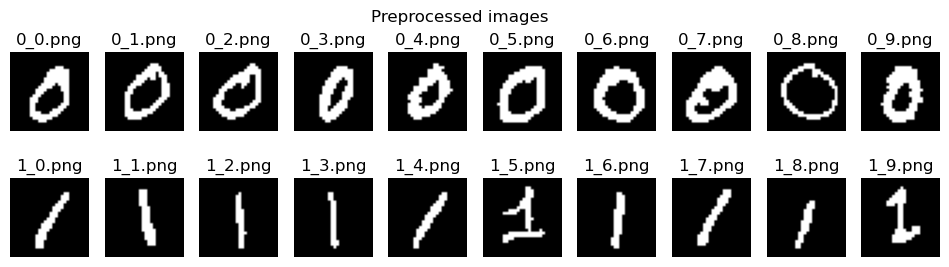

In [9]:
# Fill the lists below with your preprocessed images of "0"s and "1"s  
zeros = bin_zeros_im
ones = bin_ones_im

# Plot images
fig, axes = plt.subplots(2, len(zeros), figsize=(12, 3))
for ax, im, nm in zip(axes[0], zeros, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], ones, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
fig.suptitle("Preprocessed images")
plt.show()

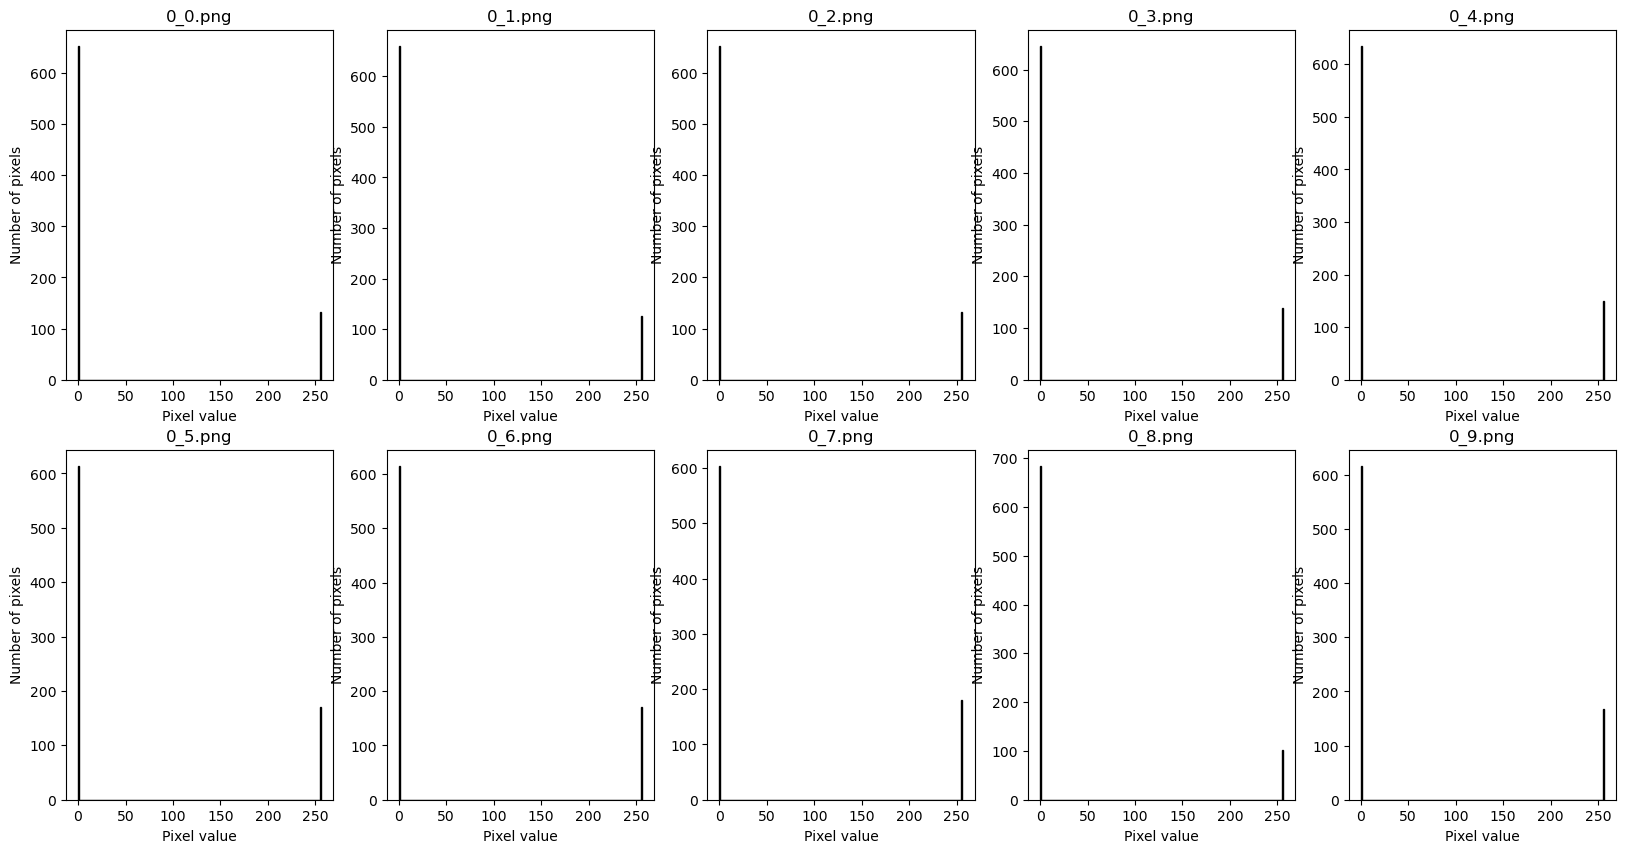

<Figure size 640x480 with 0 Axes>

In [10]:
hist_plot(zeros, zeros_names)

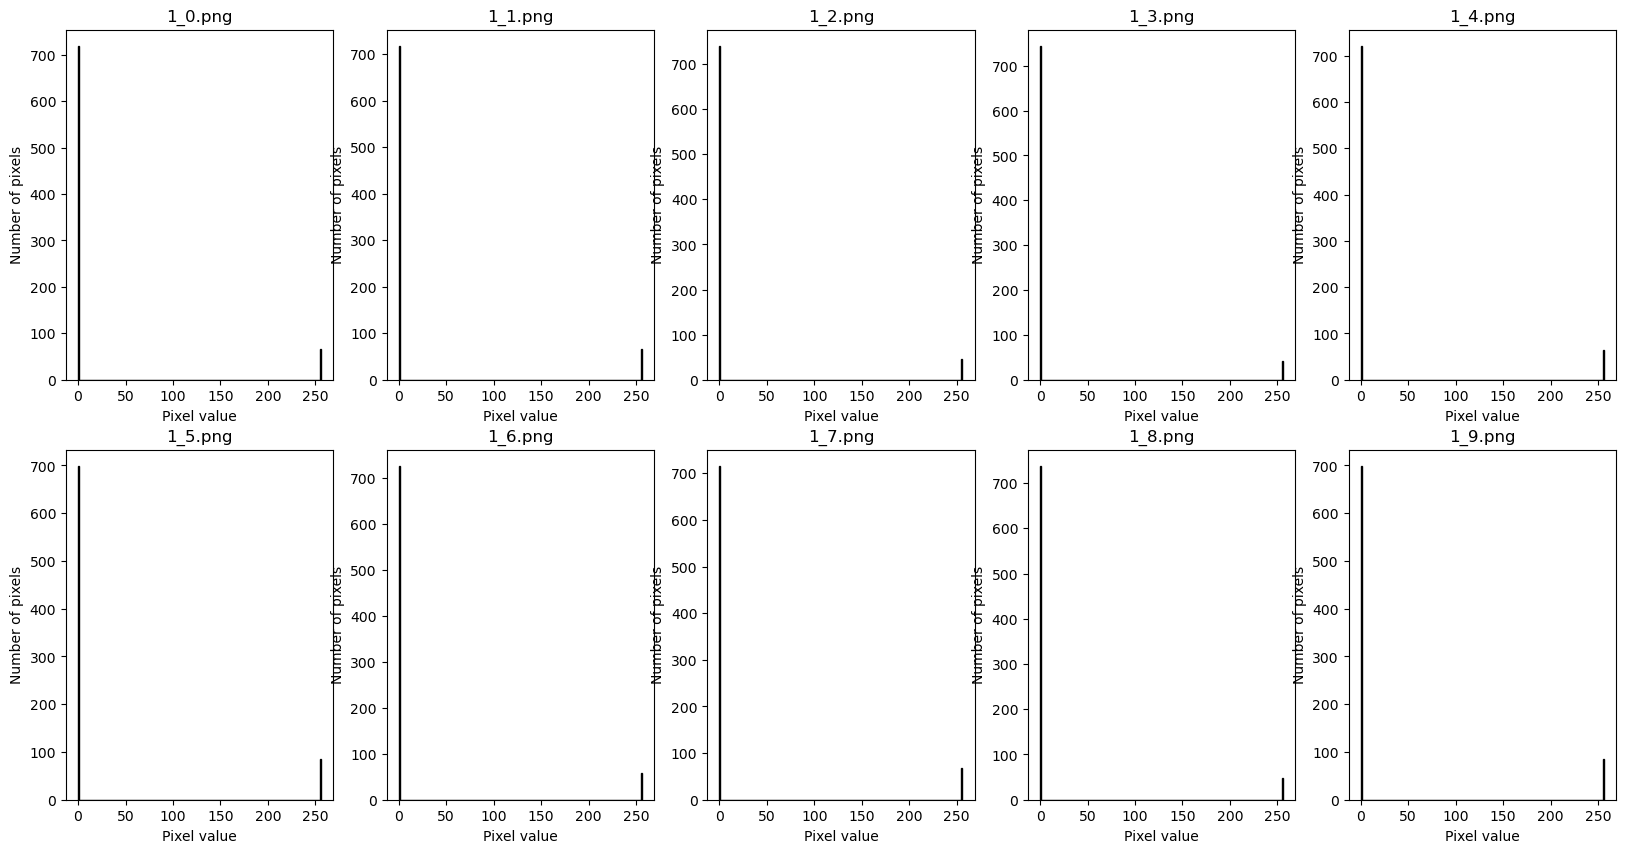

<Figure size 640x480 with 0 Axes>

In [11]:
hist_plot(ones, ones_names)

#### Discussion

We observe that now the images are well binarized and that no further preprocessing is needed. 

### 1.2. Get descriptors (4 pts)

We start by defining some functions that compute the contour interpolation, transform the contour in a complex signal, and compute the descriptors. Further details are explained in the Discussion below.

In [12]:
from scipy.fft import fft, ifft
import cv2
from skimage.measure import find_contours
from scipy.interpolate import interp1d

In [13]:
def contour_interpolation(contour, L_max):
    """
    Interpolate a contour to have a coordinate list of length `L_max`.
    
    Inputs:
    -------
    contour: np.array of N x 2, where N is the number of points in the
        contour, and the first and second columns represent the x- and
        y-dimensions, respectively.
    L_max: Number of interpolation points.
    
    Outputs:
    --------
    The interpolated contour
    """
    L = len(contour)
    new_inputs = np.linspace(0, L - 1, L_max)
    interps = [interp1d(range(L), dim) for dim in contour.T]
    return np.array([interp(new_inputs) for interp in interps]).T

In [14]:
def get_complex_signal(contour):
    """
    Convert a contour to a complex signal.
    
    Inputs:
    -------
    contour: np.array of N x 2, where N is the number of points in the
        contour, and the first and second columns represent the x- and
        y-dimensions, respectively.
    
    Outputs:
    --------
    The complex signal of shape N x 1
    """
    return np.array([complex(*p) for p in contour]) 

The following function computes the Fourier descriptors. It is a variation of the prompt given in the lab as it allows to automatically set the number of interpolation points from the contours computation.

In [15]:
def get_descriptors(contour, L_max):
    """
    Compute the descriptors of a contour.
    
    Inputs:
    -------
    contour: np.array of N x 2, where N is the number of points in the
        contour, and the first and second columns represent the x- and
        y-dimensions, respectively.
    L_max: integer length of the longest contour of all digits.
    
    Outputs:
    --------
    The descriptors
    """

    interp_contour = contour_interpolation(contour, L_max)
    complex_contour = get_complex_signal(interp_contour)
    
    return fft(complex_contour) 


In [16]:
# Get contours
contour_0 = [find_contours(im)[0] for im in zeros] #retrieve only the external contour for 0s
contour_1 = [find_contours(im)[0] for im in ones]

# get the longest contour
L_max_0 = max([len(contour) for contour in contour_0])
L_max_1 = max([len(contour) for contour in contour_1])
print(L_max_0)
print(L_max_1)

descr_0 = [get_descriptors(contour, L_max_0) for contour in contour_0]
descr_1 = [get_descriptors(contour, L_max_1) for contour in contour_1]

81
99


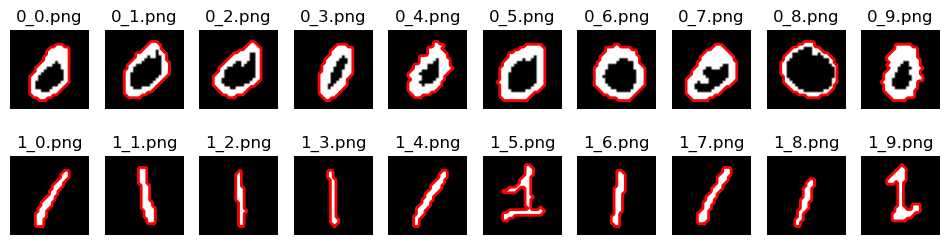

In [17]:
# Plot images and contours:
fig, axes = plt.subplots(2, len(zeros), figsize=(12, 3))
for ax, im, cont, nm in zip(axes[0], zeros, contour_0, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.plot(cont[:, 1], cont[:, 0], linewidth=2, color='red')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, cont, nm in zip(axes[1], ones, contour_1, ones_names):
    ax.imshow(im, cmap='gray')
    ax.plot(cont[:, 1], cont[:, 0], linewidth=2, color='red')
    ax.axis('off')
    ax.set_title(nm)
plt.show()

In [18]:
# First descriptor of each image of each class:
print("First descriptor of each image:")
print("0s:",np.array(descr_0)[:,0], "\n1s:",np.array(descr_1)[:,0])

First descriptor of each image:
0s: [1212.825 +1125.025j  1125.7   +1163.2j    1146.8375+1112.5375j
 1178.3   +1168.4j    1123.5   +1155.25j   1206.175 +1089.725j
 1202.45  +1179.05j   1221.35  +1101.55j   1122.5   +1183.j
 1188.675 +1137.075j ] 
1s: [1417.94897959+1404.44897959j 1367.21428571+1417.28571429j
 1459.78571429+1405.3877551j  1447.54081633+1330.87755102j
 1417.96938776+1403.46938776j 1410.5       +1355.j
 1455.29591837+1395.79591837j 1329.65306122+1415.15306122j
 1592.5       +1285.j         1341.47959184+1385.67346939j]


#### Discussion

For this part we start by computing the contours using scikit-image's function `find_contours`. For each image, we only take the first output of the function which consists with the outer contour. Afterwards, we set the number of points for the interpolation (`contour_interpolation`): all the zeros' and all the ones' contours are interpolated and the output arrays contain the same number of points (`L_max0` and `L_max1` respectively). This allows to obtain more consistent Fourier descriptors across the images.  
Then, we put the contours in complex format (`get_complex_signal`) to perform the DFT.  Finally, we apply the `fft` function and obtain the final descriptors. The descriptors are in the format of a complex array that contains the positive frequency terms, followed by the negative frequency ones (e.g. the frequencies are [0, 1, 2, 3, -4, -3, -2. -1]). The first element of the array contains the zero frequency component.  
**Note:** the descriptors obtained in this way aren't invariant to translation, rotation, scaling, and other transformations. We will discuss this aspect in the following tasks.  

As far as our results go, we can see that the contours are well detected from the plots, and in the following tasks we will prove that we are able to obtain good clusters with them. 

### 1.3. Study effect of descriptors (6 pts)

In [19]:
# Define increasing set sizes of the descriptors. You can also change these numbers.
descr_set_sizes = [1, 2, 5, 10, 20]

# Define images for which you will show the recovery. You can also change the indexes.
zero = zeros[0]
one = ones[0]

In [20]:
from scipy.fft import ifft

def reconstruct_img(descriptors, N):
    """
    Reconstruct an image from its descriptors.
    
    Inputs:
    -------
    descriptors: np.array.
    N: number of descriptors to keep.
    
    Outputs:
    --------
    The reconstructed image
    """
    new_descr = descriptors.copy()
    if N !=0:
        new_descr[N+1:-N] = 0 # keep only the N first and N last coefficients
    else:
        new_descr[1:] = 0 # keep only the first coefficient

    complex_reconstr = ifft(new_descr)
    reconstr = np.array([[c.real, c.imag] for c in complex_reconstr])
    
    return reconstr

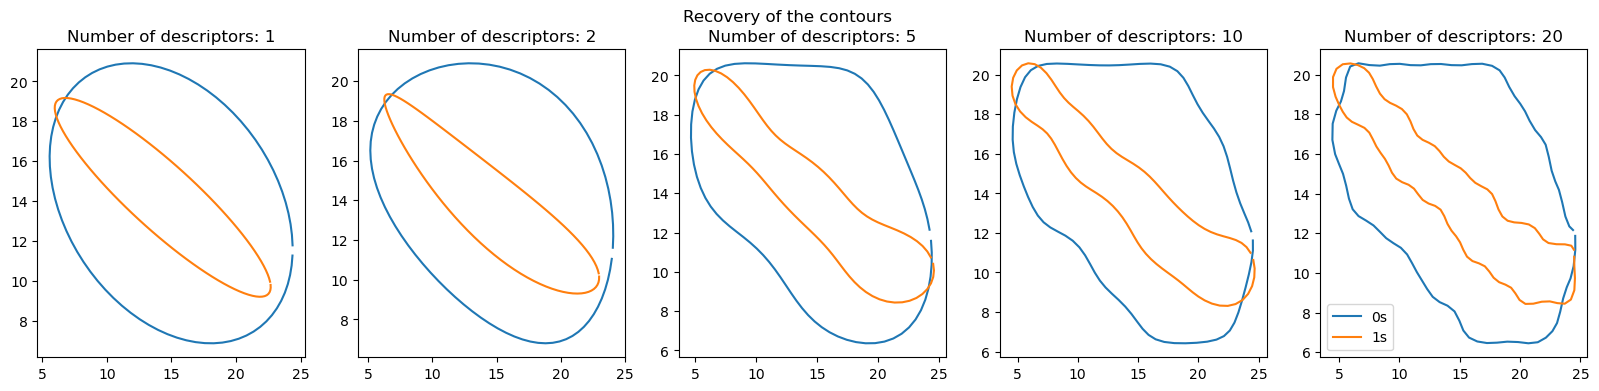

In [21]:
# On each of the 5 plots you will show the recovery for a "0" and a "1" (use the same axis for both a "0" and a "1").
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

# Plot recovery for a zero image
for i in range(0,  5):
    descriptor_size = descr_set_sizes[i]
    #print(descriptor_size)
    contour = find_contours(zero)[0]
    descriptors = get_descriptors(contour, L_max_0)
    #print(descriptors.shape)
    reconstructed_img = reconstruct_img(descriptors, descriptor_size)
    axes[i].plot(reconstructed_img[:,0], reconstructed_img[:,1], label = "0s")
    axes[i].title.set_text("Number of descriptors: "+ str(descriptor_size))

# Plot recovery for a one image
for i in range(0,  5):
    descriptor_size = descr_set_sizes[i]
    contour = find_contours(one)[0]
    descriptors = get_descriptors(contour, L_max_1)
    reconstructed_img = reconstruct_img(descriptors, descriptor_size)
    axes[i].plot(reconstructed_img[:,0], reconstructed_img[:,1], label = "1s")

fig.suptitle("Recovery of the contours")
plt.legend(loc='best')
plt.show()

#### Discussion

Here, we can see that the reconstruction is more and more precise adding more descriptors. We can see that the first descriptors are enough to reconstruct the contour of the 0, while the first 5 are enough to reconstruct the contour of the 1. However, we observe that the reconstruction is rotated by 90 degrees for both images. This is due to the fact that the first descriptors are more sensitive to rotation if the images aren't centered before because they capture the center of mass of the objects. 

### 1.4 Clustering (2 pts)

In [22]:
# First feature for all "0"s
zeros_f1 = []
# Second feature for all "0"s
zeros_f2 = []
# Fist feature for all "1"s
ones_f1 = []
# Second feature for all "1"s
ones_f2 = []

In [23]:
# For each zeros and ones, extract a 2-dimensional feature vector using only the positive bin frequencies from fftfreq :
for img in zeros:
    contour = find_contours(img)[0]
    descriptors = get_descriptors(contour, L_max_0)
    # zeros_f1.append(descriptors[1].real)
    # zeros_f2.append(descriptors[2].real)
    zeros_f1.append(np.abs(descriptors[1]))
    zeros_f2.append(np.abs(descriptors[2]))
print(zeros_f1)
print(zeros_f2)
for img in ones:
    contour = find_contours(img)[0]
    descriptors = get_descriptors(contour, L_max_1)
    # ones_f1.append(descriptors[1].real)
    # ones_f2.append(descriptors[2].real)
    ones_f1.append(np.abs(descriptors[1]))
    ones_f2.append(np.abs(descriptors[2]))

[146.152198638872, 120.31129166232782, 128.17310684208772, 167.04198396849512, 143.655504318867, 93.31119925460668, 36.94633572602794, 110.72577338121205, 34.107478428050314, 94.77491204734537]
[29.855373625752257, 24.11732930641471, 43.25757854095057, 5.8305552414559605, 27.343683201207895, 21.734405766777375, 16.99008065161524, 35.35772694818296, 14.067879704557253, 10.028267445100399]


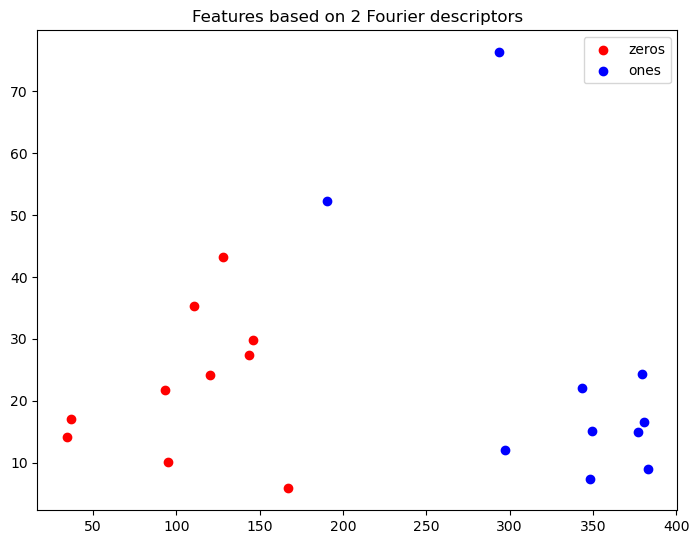

In [24]:
# Plot features for all images
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(zeros_f1, zeros_f2, color='r', label='zeros')
ax.scatter(ones_f1, ones_f2, color='b', label='ones')
ax.legend(loc='best')
plt.title("Features based on 2 Fourier descriptors")
plt.show()

Here, we get 2 nicely distinct clusters, which means that the first 2 Fourier descriptors are good features to distinguish between 0s and 1s. This is due to the fact that the first 2 Fourier descriptors are the ones with the lowest frequencies, capable of capturing the most important features of the image. However, as stated before, the descriptors chosen aren't invariant to all transformations, specifically they aren't invariant to scaling. In the next part we will discuss this aspect.

### 1.5 Transformation invariance (6 pts)

#### Discussion:
1. Translation: the first descriptor is the one with the lowest frequency, which is the one that is most affected by the translation. Therefore, we need to remove it from the descriptors.
2. A rotation affects the phase of all the descriptors by the same amount, and does not modify their amplitude, therefore we need to remove the phase from the descriptors and keep only the amplitude.
3. A scaling does not change the ratio between the amplitudes of the descriptors, therefore we need to remove the amplitude from the descriptors and keep only the ratio between them.
4. A combination of the above corrections is needed to make the descriptors invariant to all the transformations.

#### Implementation

In [25]:
# Implement a function that takes as input an image and outputs 
# a set of features invariant to scale, rotation and translation, 
# according to function boolean parameters.
# You may use your functions defined in section 1.2.

def get_invariant_features(img, L_max, inv_to_rotation=False, inv_to_translation=False, inv_to_scale=False):
    """ 
    Compute the invariant features of an image.

    Inputs:
    -------
    img: np.array of size (M, N).
    inv_to_rotation: boolean.
    inv_to_translation: boolean.
    inv_to_scale: boolean.

    Outputs:
    --------
    The invariant features of the image.
    """
    contour = find_contours(img)[0]
    # L_max = len(contour)
    descriptors = get_descriptors(contour, L_max) # real and imaginary parts of the Fourier descriptors i.e. amplitude and phase of the Fourier coefficients of the contour
    if inv_to_translation:
        # operation on descriptors to get invariance to translation:
        # remove the first coefficient (real part of the first Fourier descriptor):
        descriptors[0] = 0
    if inv_to_rotation:
        descriptors = np.abs(descriptors)
    if inv_to_scale:
        # operation on descriptors to get invariance to scaling:
        # divide all Fourier descriptors by magnitude of the last one:
        descriptors = descriptors/descriptors[-1]
    return descriptors

To prove that our function properly works, we show below that, by applying it to the original figure we obtain very similar clusters, but with the descriptors that are now in a different scale.

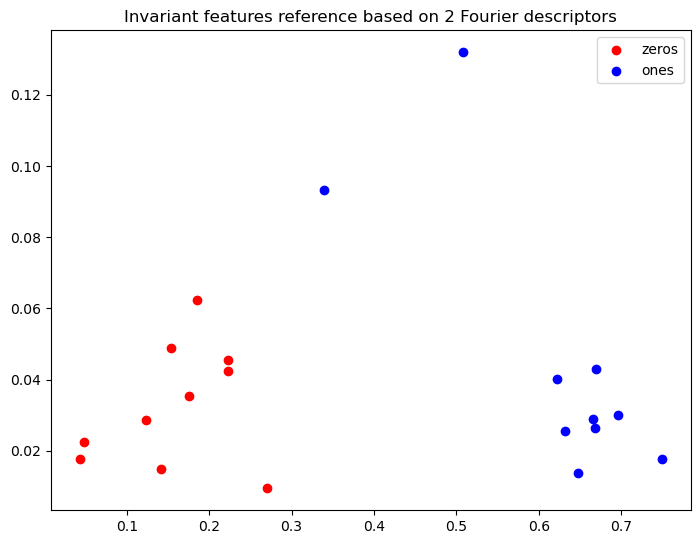

In [26]:
zeros_f1 = []
zeros_f2 = []
ones_f1 = []
ones_f2 = []
for img in zeros:
    descriptors = get_invariant_features(img, L_max_0, inv_to_scale = True, inv_to_rotation=True, inv_to_translation=True)
    # take the real part of the invariant features:
    zeros_f1.append(np.abs(descriptors[1]))
    zeros_f2.append(np.abs(descriptors[2]))
for img in ones:
    descriptors = get_invariant_features(img, L_max_1, inv_to_scale = True, inv_to_rotation=True, inv_to_translation=True)
    ones_f1.append(np.abs(descriptors[1]))
    ones_f2.append(np.abs(descriptors[2]))
# Plot features for all images
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(zeros_f1, zeros_f2, color='r', label='zeros')
ax.scatter(ones_f1, ones_f2, color='b', label='ones')
ax.legend(loc='best')
plt.title("Invariant features reference based on 2 Fourier descriptors")
plt.show()

In [27]:
from scipy.ndimage import rotate

# functions to apply the transformations 

def scale(u):
    
    # shift to center
    centered_u = u - complex(14, 14)
    
    # scale and reshift
    scaled_u = centered_u * (np.random.rand() + 0.5)
    
    # reshift and return
    return scaled_u + complex(14, 14)
    
def shift(img):
    
    # get random shift coordinates between -5 and 5
    # shift_by = complex(*(np.random.rand(2) - 0.5)) * 10
    
    # # shift and return
    # return shift_by + u
    H, W = img.shape
    x = np.random.randint(-W//4, W//4)
    y = np.random.randint(-H//4, H//4)
    M = np.float32([[1, 0, x], [0, 1, y]])
    translated_img = cv2.warpAffine(img, M, (W, H))
    return translated_img


def rotate_img(u):
    return rotate(u, np.random.rand() * 360, reshape=True)
    

In [28]:
# We will define 4 sets of new images below
np.random.seed(43)
# Apply only rotation for each "0" and "1" and store results below:
rotated_images_zeros = []
rotated_images_ones = []
for img in zeros:
    rotated_images_zeros.append(rotate_img(img))
for img in ones:
    rotated_images_ones.append(rotate_img(img))

# Apply only translation for each "0" and "1" and store results below:
translated_images_zeros = []
translated_images_ones = []
for img in zeros:
    translated_images_zeros.append(shift(img))
for img in ones:
    translated_images_ones.append(shift(img))

# Apply only scaling for each "0" and "1" and store results below
scaled_images_zeros = []
scaled_images_ones = []
for img in zeros:
    scaled_images_zeros.append(scale(img))
for img in ones:
    scaled_images_ones.append(scale(img))

# Apply all 3 transformations sequentially, in your custom order, for each "0" and "1" and store results below:
transformed_images_zeros = []
transformed_images_ones = []
for img in zeros:
    transformed_images_zeros.append(scale(shift(rotate_img(img))))
for img in ones:
    transformed_images_ones.append(scale(shift(rotate_img(img))))

C:\Users\camil\AppData\Local\Temp\ipykernel_9700\397166692.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  ax.imshow(transformed_images_zeros[i].astype(float), cmap='gray')


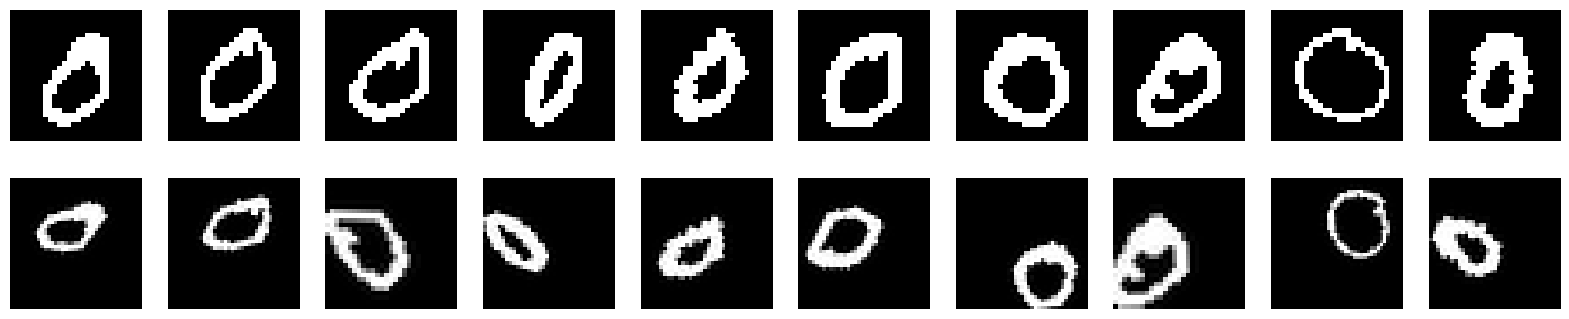

In [29]:
# Show the first 10 images of each set of transformed images (20 images in total):
fig = plt.figure(figsize=(20, 4))
for i in range(10):
    ax = fig.add_subplot(2, 10, i+1)
    ax.imshow(zeros[i], cmap='gray')
    ax.axis('off')
    ax = fig.add_subplot(2, 10, i+11)
    ax.imshow(transformed_images_zeros[i].astype(float), cmap='gray')
    ax.axis('off')
plt.show()

C:\Users\camil\AppData\Local\Temp\ipykernel_9700\1994601708.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  ax.imshow(transformed_images_ones[i].astype(float), cmap='gray')


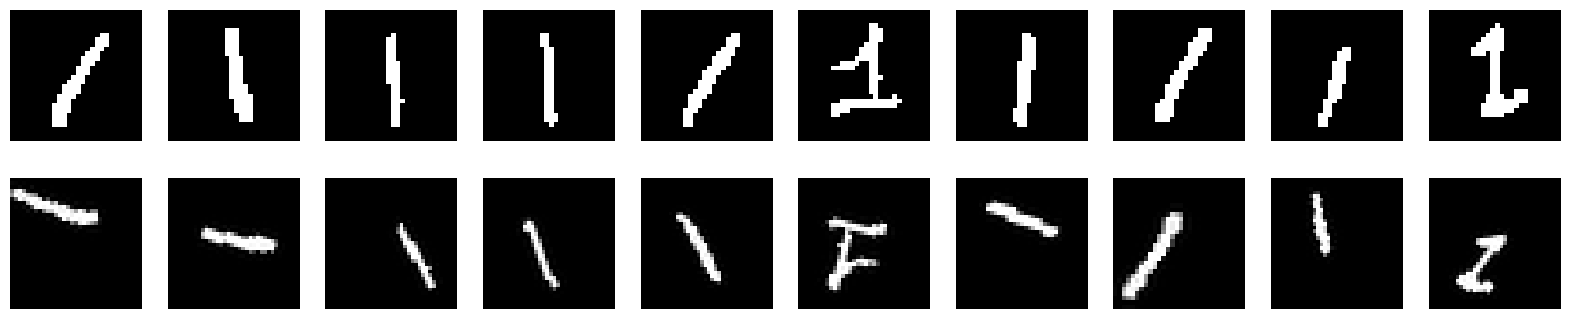

In [30]:
# Show the first 10 images of each set of transformed images (20 images in total):
fig = plt.figure(figsize=(20, 4))
for i in range(10):
    ax = fig.add_subplot(2, 10, i+1)
    ax.imshow(ones[i], cmap='gray')
    ax.axis('off')
    ax = fig.add_subplot(2, 10, i+11)
    ax.imshow(transformed_images_ones[i].astype(float), cmap='gray')
    ax.axis('off')
plt.show()

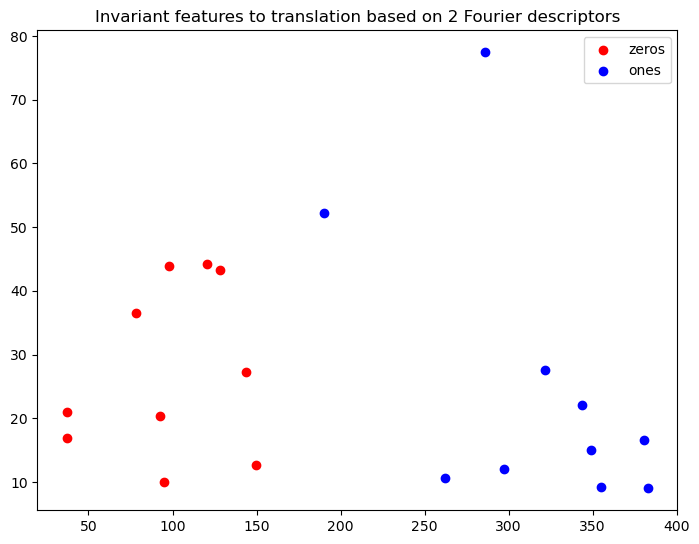

In [31]:
# Invariance to translation plot:  
zeros_f1 = []
zeros_f2 = []
ones_f1 = []
ones_f2 = []
for img in translated_images_zeros:
    descriptors = get_invariant_features(img, L_max_0, inv_to_translation=True)
    # Store the first and second Fourier descriptors (positive frequencies) for each image in the corresponding list:
    # zeros_f1.append(descriptors[1].real)
    # zeros_f2.append(descriptors[2].real)
    zeros_f1.append(np.abs(descriptors[1]))
    zeros_f2.append(np.abs(descriptors[2]))
for img in translated_images_ones:
    descriptors = get_invariant_features(img, L_max_1, inv_to_translation=True)
    # ones_f1.append(descriptors[1].real)
    # ones_f2.append(descriptors[2].real)
    ones_f1.append(np.abs(descriptors[1]))
    ones_f2.append(np.abs(descriptors[2]))
# Plot features for all images
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(zeros_f1, zeros_f2, color='r', label='zeros')
ax.scatter(ones_f1, ones_f2, color='b', label='ones')
ax.legend(loc='best')
plt.title("Invariant features to translation based on 2 Fourier descriptors")
plt.show()

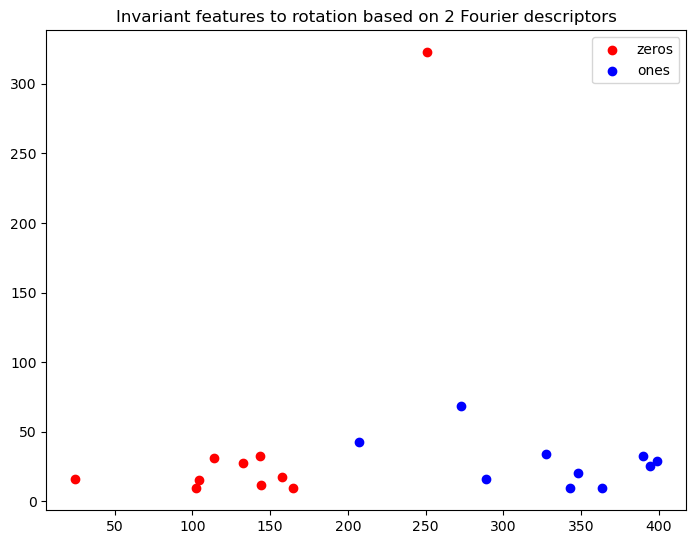

In [32]:
# Invariance to rotation plot:  
zeros_f1 = []
zeros_f2 = []
ones_f1 = []
ones_f2 = []
for img in rotated_images_zeros:
    descriptors = get_invariant_features(img, L_max_0, inv_to_rotation=True)
    # take the real part of the invariant features:
    # zeros_f1.append(descriptors[1].real)
    # zeros_f2.append(descriptors[2].real)
    zeros_f1.append(np.abs(descriptors[1]))
    zeros_f2.append(np.abs(descriptors[2]))
for img in rotated_images_ones:
    descriptors = get_invariant_features(img, L_max_1, inv_to_rotation=True)
    # ones_f1.append(descriptors[1].real)
    # ones_f2.append(descriptors[2].real)
    ones_f1.append(np.abs(descriptors[1]))
    ones_f2.append(np.abs(descriptors[2]))
# Plot features for all images
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(zeros_f1, zeros_f2, color='r', label='zeros')
ax.scatter(ones_f1, ones_f2, color='b', label='ones')
ax.legend(loc='best')
plt.title("Invariant features to rotation based on 2 Fourier descriptors")
plt.show()

c:\Users\camil\anaconda3\envs\ada\lib\site-packages\skimage\measure\_find_contours.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  segments = _get_contour_segments(image.astype(np.float64), float(level),


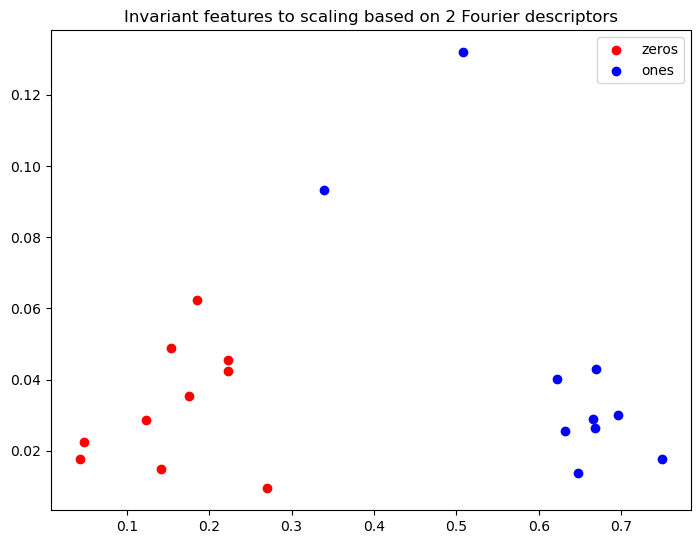

In [33]:
# Invariance to scaling plot:
zeros_f1 = []
zeros_f2 = []
ones_f1 = []
ones_f2 = []
for img in scaled_images_zeros:
    descriptors = get_invariant_features(img, L_max_0, inv_to_scale=True)
    # take the real part of the invariant features:
    zeros_f1.append(np.abs(descriptors[1]))
    zeros_f2.append(np.abs(descriptors[2]))
for img in scaled_images_ones:
    descriptors = get_invariant_features(img, L_max_1, inv_to_scale=True)
    ones_f1.append(np.abs(descriptors[1]))
    ones_f2.append(np.abs(descriptors[2]))
# Plot features for all images
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(zeros_f1, zeros_f2, color='r', label='zeros')
ax.scatter(ones_f1, ones_f2, color='b', label='ones')
ax.legend(loc='best')
plt.title("Invariant features to scaling based on 2 Fourier descriptors")
plt.show()

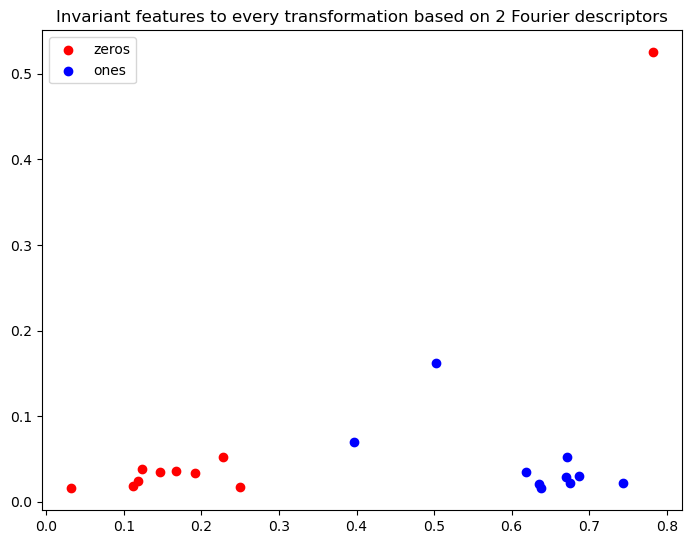

In [34]:
# Invariance to every transformation plot:
zeros_f1 = []
zeros_f2 = []
ones_f1 = []
ones_f2 = []
for img in transformed_images_zeros:
    descriptors = get_invariant_features(img, L_max_0, inv_to_scale=True, inv_to_translation = True, inv_to_rotation = True)
    # take the real part of the invariant features:
    zeros_f1.append(np.abs(descriptors[1]))
    zeros_f2.append(np.abs(descriptors[2]))
for img in transformed_images_ones:
    descriptors = get_invariant_features(img, L_max_1, inv_to_scale=True, inv_to_translation = True, inv_to_rotation = True)
    ones_f1.append(np.abs(descriptors[1]))
    ones_f2.append(np.abs(descriptors[2]))
# Plot features for all images
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(zeros_f1, zeros_f2, color='r', label='zeros')
ax.scatter(ones_f1, ones_f2, color='b', label='ones')
ax.legend(loc='best')
plt.title("Invariant features to every transformation based on 2 Fourier descriptors")
plt.show()

#### Discussion

Here, we can see that we end up with the same clusters as before for the translation and scaling, meaning that we have invariant descriptors. However, we fail to obtain the exact same clusters for the rotation, and for all transformations because it affects the overall result. In 1.4, when we plot the cluster, it is already invariant to both translation and rotation because we plot the absolute value (i.e. amplitude) of the second and third descriptors. Also, as we obtain good clusters for the translation and scaling, we can conclude that there is a problem with the way we perform the rotation of the image rather than how we make the descriptors invariant to it.
Finally, when plotting the descriptors without applying invariance on the descriptors from the rotated images, we can see that the clusters are identical to when we apply the invariance, meaning that the invariance works properly but not the rotation.

In [35]:
zeros_f1 = []
zeros_f2 = []
ones_f1 = []
ones_f2 = []
for img in rotated_images_zeros:
    contour = find_contours(img)[0]
    descriptors = get_descriptors(contour, L_max_0)
    zeros_f1.append(np.abs(descriptors[1]))
    zeros_f2.append(np.abs(descriptors[2]))
for img in rotated_images_ones:
    contour = find_contours(img)[0]
    descriptors = get_descriptors(contour, L_max_1)
    ones_f1.append(np.abs(descriptors[1]))
    ones_f2.append(np.abs(descriptors[2]))

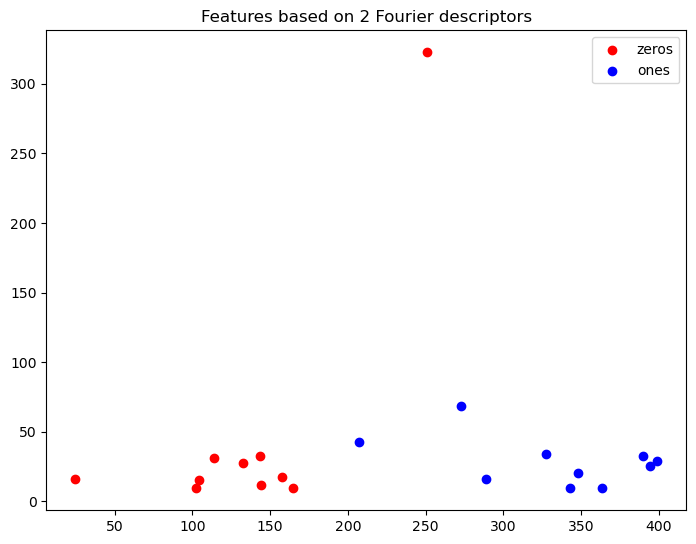

In [36]:
# Plot features for all images
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(zeros_f1, zeros_f2, color='r', label='zeros')
ax.scatter(ones_f1, ones_f2, color='b', label='ones')
ax.legend(loc='best')
plt.title("Features based on 2 Fourier descriptors")
plt.show()

## PART 2 - region based descriptors (10 pts)

In this part, you will use the "2"s and "3"s images.

**Objectives overview**:

**1)** *Cluster on compacity*: Based on custom definitions of perimeter and area for each image of "2" and "3" (preprocessed - by you), make a 2D plot with 2-dimensional feature vectors, similar to section 1.4. After that, define the compacity feature for each "2"s and "3"s image. Are you still able to obtain a 1D plot with values clustered in 2 well-defined regions? Discuss your findings. (**6 pts**).

**2)** *Additional method*: Choose one more region-based method (from the course or your own sources - internet allowed) and redo the 1D plot in section 2.1 (or 2D plot, depending on your choosing). Explain your method and your findings. (**4 pts**)

### 2.3. Cluster on compacity (6 pts)

We start with applying some preprocessing, analog to the one applied for the 0s and 1s' cases.

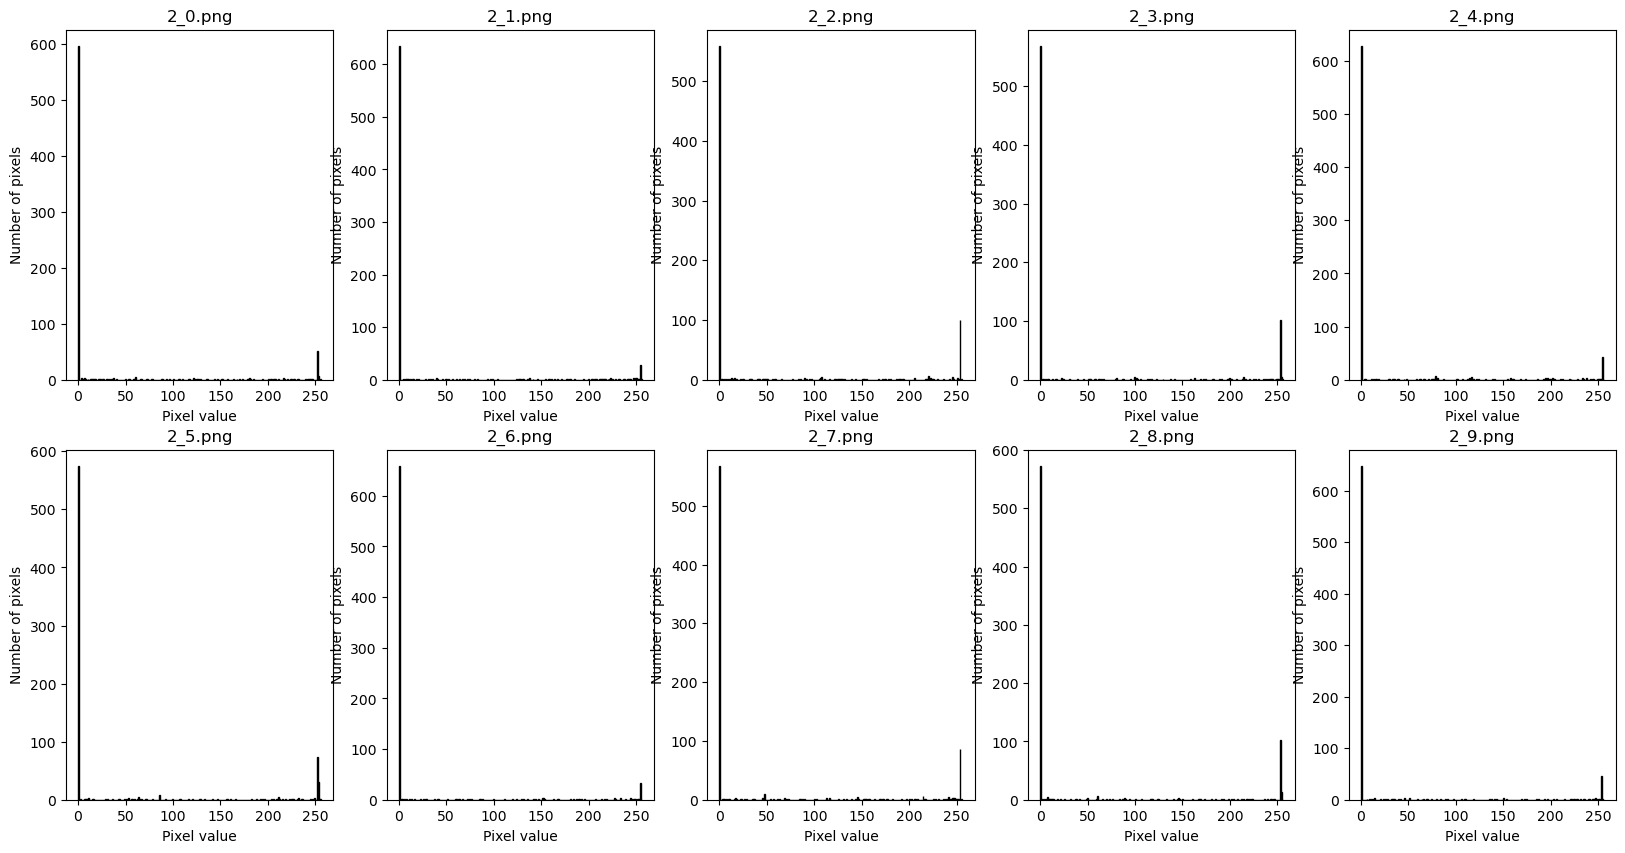

<Figure size 640x480 with 0 Axes>

In [191]:
# we plot the histograms of the twos:
hist_plot(twos_im, twos_names)

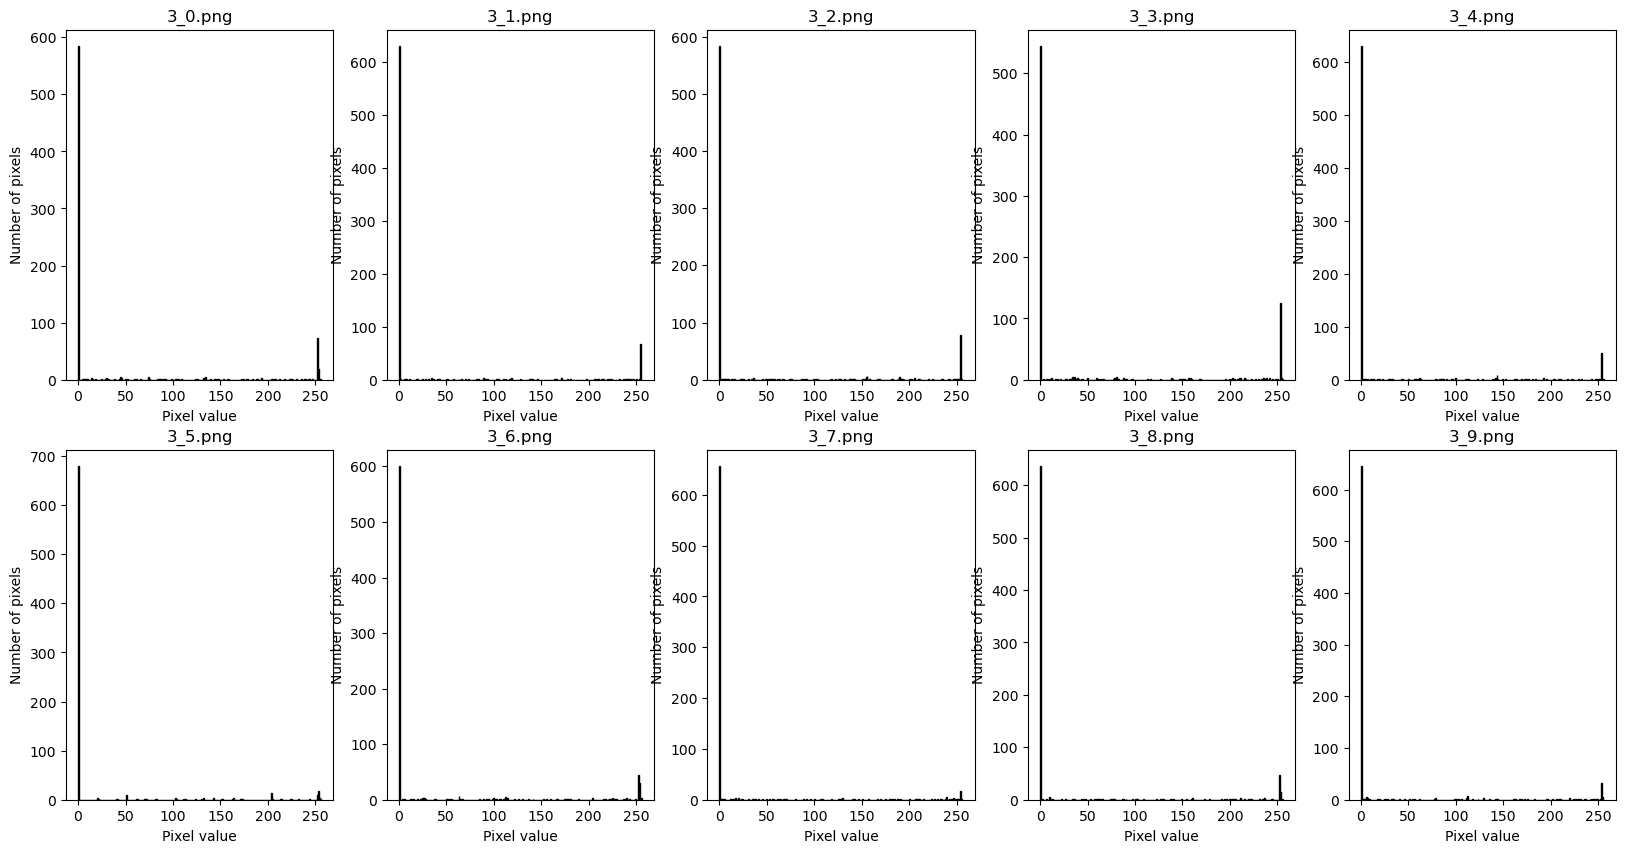

<Figure size 640x480 with 0 Axes>

In [ ]:
# we plot the histograms of the zeros:
hist_plot(threes_im, threes_names)

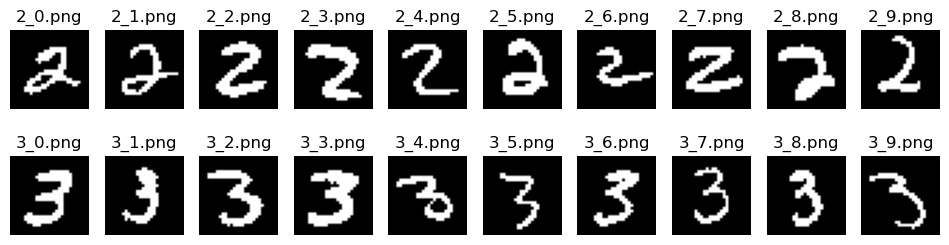

In [192]:
bin_twos_im = bin_transform(twos_im)
bin_threes_im = bin_transform(threes_im)

# Plot images
fig, axes = plt.subplots(2, len(bin_twos_im), figsize=(12, 3))
for ax, im, nm in zip(axes[0], bin_twos_im, twos_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], bin_threes_im, threes_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

By visual inspection, we don't detect further specific preprocessing needed. We therefore proceed on defining the perimeter and the area of the images. For this purpose, we use the OpenCV library functions: we first compute the contours of the images with `findContours` and then we use `contourArea` and `arcLength` to compute the areas and the perimeters respectively. 

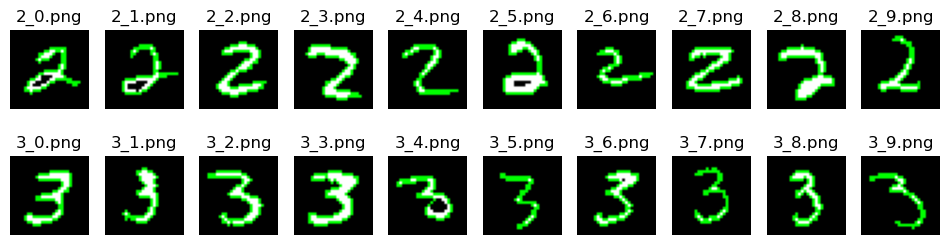

In [ ]:
# compute the contour of the images:
contour_2 = [cv2.findContours(im, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) for im in bin_twos_im]
bin_twos_im_to_plot = [cv2.cvtColor(np.array(im), cv2.COLOR_GRAY2RGB) for im in bin_twos_im]
draw_2 = [cv2.drawContours(im, cnt[0], -1, (0, 255, 0), 1) for im, cnt in zip(bin_twos_im_to_plot, contour_2)]

contour_3 = [cv2.findContours(im, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) for im in bin_threes_im]
bin_threes_im_to_plot = [cv2.cvtColor(np.array(im), cv2.COLOR_GRAY2RGB) for im in bin_threes_im]
draw_3 = [cv2.drawContours(im, cnt[0], -1, (0, 255, 0), 1) for im, cnt in zip(bin_threes_im_to_plot, contour_3)]

# Plot images and contours:
fig, axes = plt.subplots(2, len(bin_twos_im), figsize=(12, 3))
for ax, im,  nm in zip(axes[0], draw_2, twos_names):
    ax.imshow(im, cmap='gray')
    # ax.plot(cont[:, 1], cont[:, 0], linewidth=2, color='red')
    ax.axis('off')
    ax.set_title(nm)

for ax, im, nm in zip(axes[1], draw_3, threes_names):
    ax.imshow(im, cmap='gray')
    # ax.plot(cont[:, 1], cont[:, 0], linewidth=2, color='red')
    ax.axis('off')
    ax.set_title(nm)

In [ ]:
perimeter_2 = [cv2.arcLength(cnt[0][0], True) for cnt in contour_2]
area_2 = [cv2.contourArea(cnt[0][0]) for cnt in contour_2]

perimeter_3 = [cv2.arcLength(cnt[0][0], True) for cnt in contour_3]
area_3 = [cv2.contourArea(cnt[0][0]) for cnt in contour_3]


In [ ]:
print(f"2s:\nperimeter: {perimeter_2}\narea: {area_2}")
print(f"3s:\nperimeter: {perimeter_3}\narea: {area_3}")

2s:
perimeter: [85.01219260692596, 82.5269113779068, 99.49747383594513, 93.25483322143555, 89.5979790687561, 79.11269783973694, 77.94112491607666, 107.49747383594513, 82.5269113779068, 76.76955199241638]
area: [89.5, 81.5, 112.5, 121.0, 58.0, 129.0, 53.0, 112.5, 116.5, 62.0]
3s:
perimeter: [91.94112491607666, 71.01219260692596, 100.08326029777527, 96.42640614509583, 75.11269783973694, 78.18376553058624, 86.08326029777527, 88.08326029777527, 78.42640614509583, 87.84061968326569]
area: [101.0, 79.5, 100.0, 138.0, 93.0, 35.5, 87.0, 37.0, 70.0, 45.5]


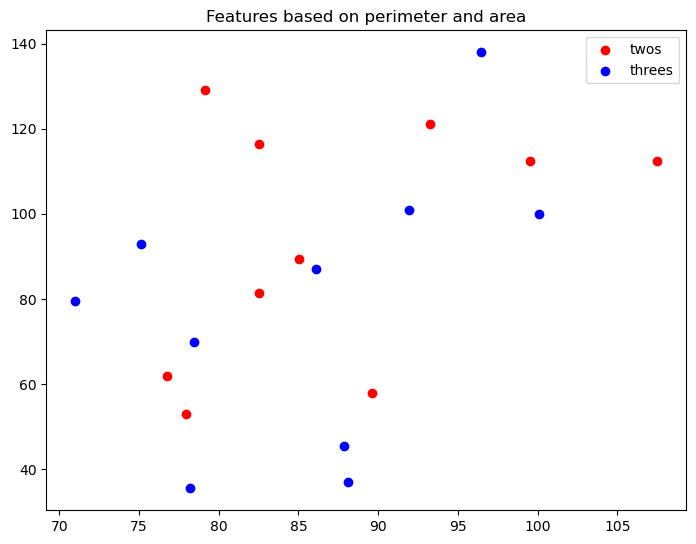

In [ ]:
# Fill the arrays below with the perimeter and area as features for "2"s and "3"s images
twos_f1 = perimeter_2
twos_f2 = area_2
threes_f1 = perimeter_3
threes_f2 = area_3

# Plot features for all images
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(twos_f1, twos_f2, color='r', label='twos')
ax.scatter(threes_f1, threes_f2, color='b', label='threes')
ax.legend(loc='best')
plt.title("Features based on perimeter and area")
plt.show()

In [ ]:
def compacity(perimeter, area):
    return (perimeter ** 2) / area

In [ ]:
compacity_2 = [compacity(perimeter, area) for perimeter, area in zip(perimeter_2, area_2)]
compacity_3 = [compacity(perimeter, area) for perimeter, area in zip(perimeter_3, area_3)]

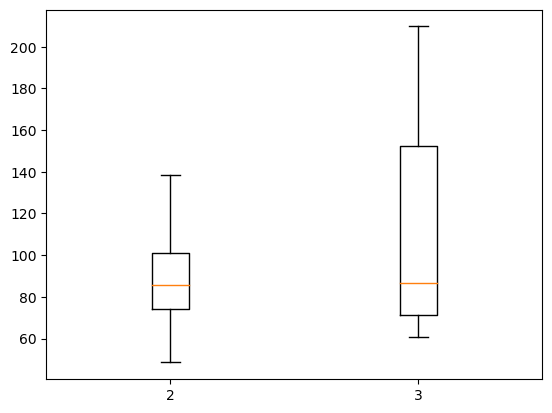

In [ ]:
# 1D plot of the compacity
plt.boxplot([compacity_2, compacity_3], labels=['2', '3']);

In [ ]:
np.mean(compacity_2), np.mean(compacity_3)

(88.1968793976122, 109.98423932210703)

####  Discussion

From the results obtained in this task we can see how the perimeter and the area aren't descriptors that help in the clustering of the 2s and the 3s. Indeed, the distributions are quite overlapped. Even the compacity doesn't help in the task: the 3s' distribution shows more variability for this descriptor, however the median and mean values don't allow the detection of 2 clearly distinct regions (also, overlap of the interquartile ranges).

### 2.2. Additional method (4 pts)

We start by investigating the moments as region based descriptors of the images. Specifically, we use the Hu Moments, which are invariant to translation, rotation and scaling.

In [ ]:
# Calculate Moments 
moments_2 = [cv2.moments(im) for im in bin_twos_im] 
moments_3 = [cv2.moments(im) for im in bin_threes_im]
# Calculate Hu Moments 
huMoments_2 = np.array([cv2.HuMoments(mom) for mom in moments_2])
huMoments_3 = np.array([cv2.HuMoments(mom) for mom in moments_3])


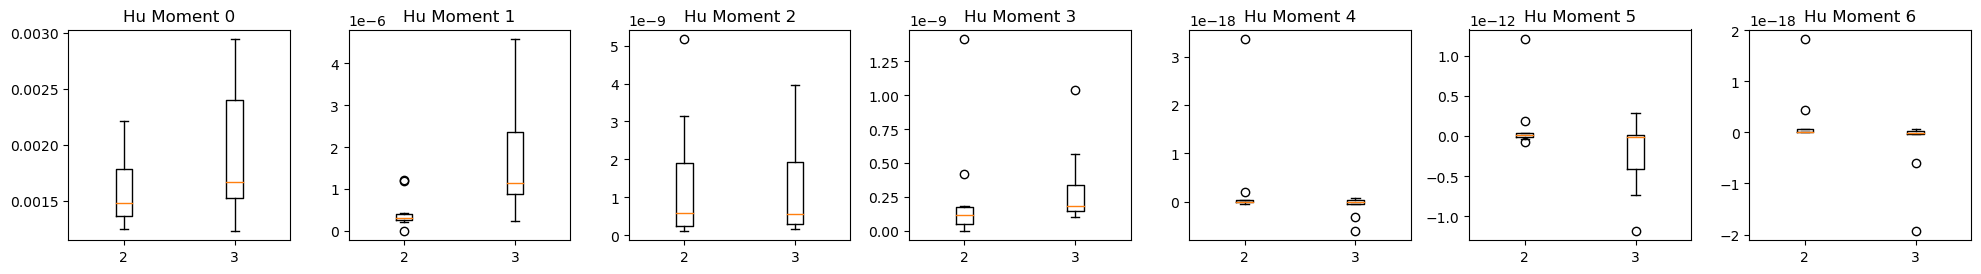

In [ ]:
# 1D plot of the compacity
fig, axes = plt.subplots(1,7, figsize=(20, 3))

for i in range(7):
    axes[i].boxplot([huMoments_2[:,i,0], huMoments_3[:,i,0]], labels=['2', '3']);
    axes[i].set_title(f"Hu Moment {i}")
plt.tight_layout()
# plt.scatter(range(len(huMoments_2)), huMoments_2, color='r', label='twos')
# plt.scatter(range(len(huMoments_3)), huMoments_3, color='b', label='threes')

From the 1D plots, we observe that none of the moments are satisfactory in the discrimination and separation of the 2s and 3s images. Indeed, for both populations all of the moments' distributions overlap and wouldn't lead to a proper classification.  
We therefore try another region based descriptor: the axes of inertia.

In [ ]:
def compute_axes_of_inertia(contour):
    x,y = contour[0][0][:,0,0], contour[0][0][:,0,1]
    
    # minimise the mean square error 
    x = x - np.mean(x)
    y = y - np.mean(y)
    coords = np.vstack([x, y])

    # calculate the covariance matrix
    cov = np.cov(coords)
    # calculate the eigenvalues and eigenvectors
    eig_vals, eig_vecs = np.linalg.eig(cov)
    # sort the eigenvalues and get the first two eigenvectors
    idx = np.argsort(eig_vals)[::-1]
    e_v1, e_v2 = eig_vals[idx[0]], eig_vals[idx[1]]
    x_v1, y_v1 = eig_vecs[:, idx[0]]  # Eigenvector with largest eigenvalue
    x_v2, y_v2 = eig_vecs[:, idx[1]]

    return x_v1, y_v1, x_v2, y_v2, e_v1, e_v2

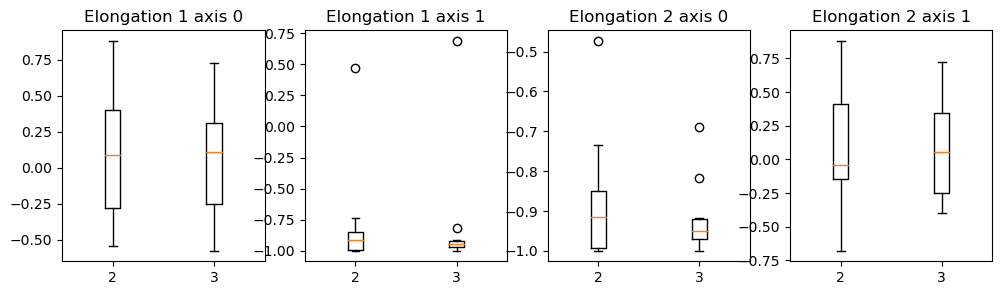

In [ ]:
inertia_axes_2 =np.array([compute_axes_of_inertia(cnt) for cnt in contour_2])
inertia_axes_3 = np.array([compute_axes_of_inertia(cnt) for cnt in contour_3])

fig, axes = plt.subplots(1, 4, figsize=(12, 3))
for i in range(4):
    axes[i].boxplot([inertia_axes_2[:,i], inertia_axes_3[:,i]], labels=['2', '3']);
    axes[i].set_title(f"Elongation {(i+2)//2} axis {i%2}")

From the above subplots, we can state that the components of the axes of inertia aren't good descriptors to classify the two populations. We therefore try with the elongation, which corresponds to the square root of the ratio of the eigenvalues of the matrix of inertia. 

Text(0.5, 1.0, 'Elongation')

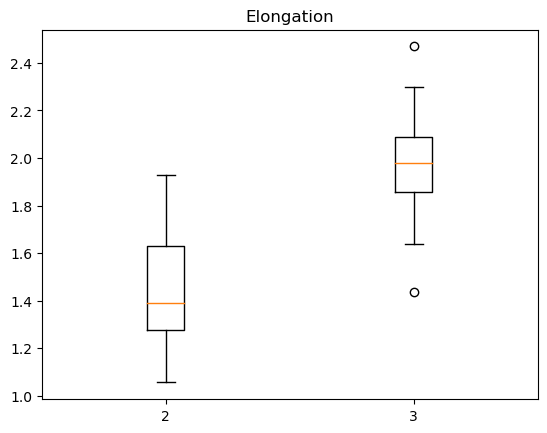

In [ ]:
plt.boxplot([np.sqrt(inertia_axes_2[:,4]/inertia_axes_2[:,5]),\
             np.sqrt(inertia_axes_3[:,4]/inertia_axes_3[:,5])], labels=['2', '3']);
plt.title("Elongation")

Here, we see that the distribution of the elongation values for the 2s and the 3s is more distinct, however there is still a quite big overlap that wouldn't allow the clear separation of the clusters. Therefore, we keep investigating and we plot only the eigenvalues of the covariance matrix. They represent the variance of the shape projected on the axes of inertia.

Text(0.5, 1.0, 'Second eigenvalue')

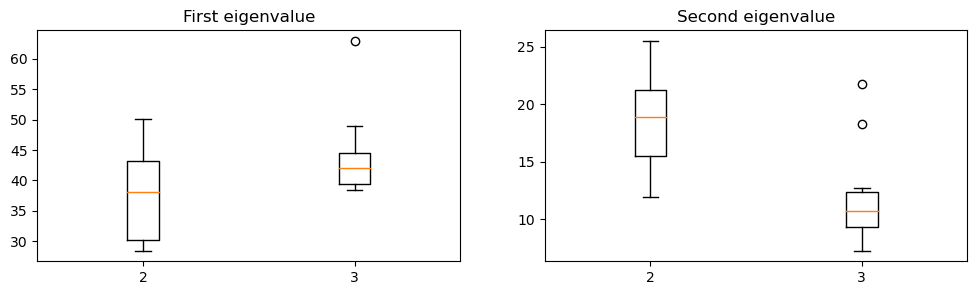

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 3))
axes[0].boxplot([inertia_axes_2[:,4], inertia_axes_3[:,4]], labels=['2', '3']);
axes[0].set_title("First eigenvalue")
axes[1].boxplot([inertia_axes_2[:,5], inertia_axes_3[:,5]], labels=['2', '3']);
axes[1].set_title("Second eigenvalue")

Here we observe a quite satisfactory separation of the distribution of the 2s and the 3s for the second eigenvalue of the covariance matrix. There are a few outliers in the 3s' population, which would lead to a misclassification of some of the images, however we state that we can be quite satisfied with this metric to cluster the two populations. 

#### Discussion

Overall, with the procedure explained above, we arrive to the conclusion that a good region based metric to discriminate the 3s and the 2s is the second eigenvalue of the covariance matrix.